# Data Science Project

* Name: Author Name
* Email:


## TABLE OF CONTENTS 


- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

# INTRODUCTION

> Explain the point of your project and what question you are trying to answer with your modeling.



In [1]:
from distutils.util import strtobool
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

sns.set_theme(font_scale=1.25, style='darkgrid')
sns.set_palette("deep", desat=0.85, color_codes=True)
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
from tools import cleaning

# OBTAIN

In [3]:
df = pd.read_csv("data/bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

# SCRUB

In [6]:
df["pdays"] = df["pdays"].replace(999, np.NaN)
df = df.replace(["unknown", "nonexistent"], np.NaN)
cleaning.info(df)

,nan,nan_%,uniq,uniq_%,dup,dup_%
pdays,39673,96.32,26,0.06,12,0.03
poutcome,35563,86.34,2,0.00,12,0.03
default,8597,20.87,2,0.00,12,0.03
education,1731,4.20,7,0.02,12,0.03
housing,990,2.40,2,0.00,12,0.03
loan,990,2.40,2,0.00,12,0.03
job,330,0.80,11,0.03,12,0.03
marital,80,0.19,3,0.01,12,0.03
age,0,0.00,78,0.19,12,0.03
nr.employed,0,0.00,11,0.03,12,0.03


In [7]:
rename = {"y": "invested",
        "poutcome": "prev_outcome",
        "pdays": "days_since_prev",
        "previous": "prev_contacts"}
df.rename(columns=rename, inplace=True)
del rename
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'days_since_prev', 'prev_contacts', 'prev_outcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'invested'],
      dtype='object')

In [8]:
cleaning.show_uniques(df, cut=20)

job,marital,education,default,housing,loan,contact,month,day_of_week,prev_contacts,prev_outcome,emp.var.rate,nr.employed,invested
housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.0,failure,1.1,5191.0,no
services,single,high.school,yes,yes,yes,cellular,jun,tue,1.0,success,1.4,5228.1,yes
admin.,divorced,basic.6y,,,,,jul,wed,2.0,,-0.1,5195.8,
blue-collar,,basic.9y,,,,,aug,thu,3.0,,-0.2,5176.3,
technician,,professional.course,,,,,oct,fri,4.0,,-1.8,5099.1,
retired,,university.degree,,,,,nov,,5.0,,-2.9,5076.2,
management,,illiterate,,,,,dec,,6.0,,-3.4,5017.5,
unemployed,,,,,,,mar,,7.0,,-3.0,5023.5,
self-employed,,,,,,,apr,,,,-1.7,5008.7,
entrepreneur,,,,,,,sep,,,,-1.1,4991.6,


In [9]:
to_bool = ["default", "housing", "loan", "invested"]
df[to_bool] = (df.loc[:, to_bool]
                .applymap(strtobool, "ignore")
                .astype(np.float64))
display(df[to_bool].head())
del to_bool

,default,housing,loan,invested
0,0.0,0.0,0.0,0.0
1,NaN,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0


<AxesSubplot:>

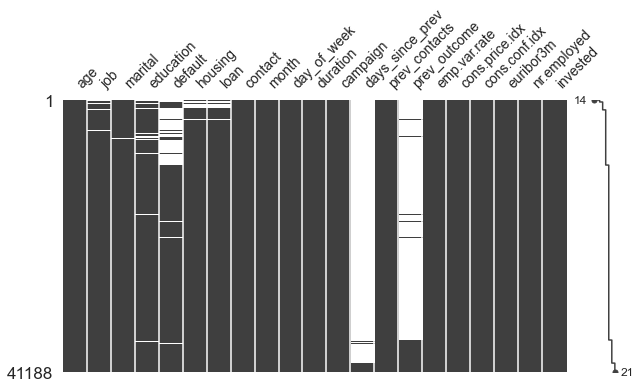

In [10]:
msno.matrix(df, figsize=(10, 5), sort="ascending", fontsize=14)

In [11]:
display(df.loc[df.duplicated()])
df.drop_duplicates(inplace=True)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,days_since_prev,prev_contacts,prev_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,invested
1266,39,blue-collar,married,basic.6y,0.0,0.0,0.0,telephone,may,thu,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.855,5191.0,0.0
12261,36,retired,married,NaN,0.0,0.0,0.0,telephone,jul,thu,...,1,NaN,0,NaN,1.4,93.918,-42.7,4.966,5228.1,0.0
14234,27,technician,single,professional.course,0.0,0.0,0.0,cellular,jul,mon,...,2,NaN,0,NaN,1.4,93.918,-42.7,4.962,5228.1,0.0
16956,47,technician,divorced,high.school,0.0,1.0,0.0,cellular,jul,thu,...,3,NaN,0,NaN,1.4,93.918,-42.7,4.962,5228.1,0.0
18465,32,technician,single,professional.course,0.0,1.0,0.0,cellular,jul,thu,...,1,NaN,0,NaN,1.4,93.918,-42.7,4.968,5228.1,0.0
20216,55,services,married,high.school,NaN,0.0,0.0,cellular,aug,mon,...,1,NaN,0,NaN,1.4,93.444,-36.1,4.965,5228.1,0.0
20534,41,technician,married,professional.course,0.0,1.0,0.0,cellular,aug,tue,...,1,NaN,0,NaN,1.4,93.444,-36.1,4.966,5228.1,0.0
25217,39,admin.,married,university.degree,0.0,0.0,0.0,cellular,nov,tue,...,2,NaN,0,NaN,-0.1,93.200,-42.0,4.153,5195.8,0.0
28477,24,services,single,high.school,0.0,1.0,0.0,cellular,apr,tue,...,1,NaN,0,NaN,-1.8,93.075,-47.1,1.423,5099.1,0.0
32516,35,admin.,married,university.degree,0.0,1.0,0.0,cellular,may,fri,...,4,NaN,0,NaN,-1.8,92.893,-46.2,1.313,5099.1,0.0


I go ahead and convert "prev_outcome" into two separate boolean features, eliminating ~35k NaNs and avoiding collinearity by implicitly dropping the NaN category. I wouldn't want to impute values for NaNs when they make up the vast majority.

In [12]:
df["prev_success"] = df["prev_outcome"] == "success"
df["prev_failure"] = df["prev_outcome"] == "failure"
df.drop(columns="prev_outcome", inplace=True)
df[["prev_success", "prev_failure"]].head()

,prev_success,prev_failure
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [13]:
# convert days to weeks and round to ceiling
# week numeral N represents the interval (N-1, N]
weeks = np.ceil(df["days_since_prev"] / 7)

# convert to categorical and relabel categories
weeks = weeks.astype("category").cat.as_ordered()
labels = ["0D", "0-1W", "1-2W", "2-3W", "3-4W"]
weeks = weeks.cat.rename_categories(labels)

# onehot encode, dropping NaN category (implicitly)
# this both eliminates ~40k NaN values and avoids collinearity
weeks = pd.get_dummies(weeks, prefix="prev_delay", dtype=np.bool_)

# join with `df` and delete temp variable
df = df.join(weeks)
del weeks

df.filter(like="prev_delay")

,prev_delay_0D,prev_delay_0-1W,prev_delay_1-2W,prev_delay_2-3W,prev_delay_3-4W
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
41183,False,False,False,False,False
41184,False,False,False,False,False
41185,False,False,False,False,False
41186,False,False,False,False,False


I convert the binary "contact" feature to a boolean feature "cellular". This is an aesthetic choice that doesn't make any difference mathematically. I'd just rather not have to worry about which label gets dropped by the one-hot encoder.

In [14]:
df["cellular"] = df["contact"] == "cellular"
df.drop(columns="contact", inplace=True)
df["cellular"].value_counts()

True     26135
False    15041
Name: cellular, dtype: int64

In [15]:
to_cat = ["job", "marital", "education", "month", "day_of_week"]

# tweak some labels
df["job"] = df["job"].str.replace(".", "", regex=False)
df["job"] = df["job"].str.replace("-", "_", regex=False)
df["education"] = df["education"].str.replace(".", "_", regex=False)

# convert to unordered categoricals
df[to_cat] = df[to_cat].astype("category")

cleaning.show_uniques(df, columns=to_cat)
del to_cat

job,marital,education,month,day_of_week
housemaid,married,basic_4y,may,mon
services,single,high_school,jun,tue
admin,divorced,basic_6y,jul,wed
blue_collar,,basic_9y,aug,thu
technician,,professional_course,oct,fri
retired,,university_degree,nov,
management,,illiterate,dec,
unemployed,,,mar,
self_employed,,,apr,
entrepreneur,,,sep,


# EXPLORE

# MODEL

# iNTERPRET

# CONCLUSIONS & RECOMMENDATIONS

> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.

# TO DO/FUTURE WORK

- 